# Load Data

The objectives of this notebook are:
* Load the Cov-19 relevant datasets
* Clean this dataset
* Explore the *Argentina* related dataset 

<based on this notebook "https://notebooks.ai/rmotr-curriculum/covid-19-40c03c06/Part+2.ipynb">_

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
# import plotly.express as px
#import theme

%matplotlib inline

## Load data

In [15]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

## Clean data

Tables that we have just read, contain information in _wide_ format, this is a list of countries, with their confirmed/recovered/lethal cases per date as columns.

The confirmed table looks just like this:

In [16]:
covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


This is why we need to **UNpivot** the tables, so they take a _long_ format, and they have a row per date

In [17]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :4],
                               var_name='date',
                               value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')

In [18]:
covid_confirmed_long

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
18571,NaN,Botswana,-22.328500,24.684900,4/2/20,4
18572,NaN,Burundi,-3.373100,29.918900,4/2/20,3
18573,NaN,Sierra Leone,8.460555,-11.779889,4/2/20,2
18574,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,4/2/20,2


Now, we would like to complete the columns to each country/region so they have the _confirmed, recovered and deaths_ columns.

In [19]:
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']

We could make explicit the information regarding the disease status of **ACTIVE**, so we have information of the number of cases **able to spread Cov-19**.

In [20]:
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']


In [21]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0,0.0


In [22]:
covid_df['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_df[['Province/State']] = covid_df[['Province/State']].fillna('')
covid_df.fillna(0, inplace=True)

Save the data in new tables.

In [23]:
covid_df.to_csv('covid_df.csv', index=None)

In [24]:
# check file is OK
# pd.read_csv('covid_df.csv')

Now we aggregate the data by Country/Region

In [25]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

In [26]:
covid_countries_df

,Country/Region,Province/State,Lat,Long,date,confirmed,deaths,recovered,active
0,Afghanistan,,33.0000,65.0000,4/2/20,273,6,3900.0,120.0
1,Albania,,41.1533,20.1683,4/2/20,277,16,58946.0,212.0
2,Algeria,,28.0339,1.6596,4/2/20,986,86,1014.0,549.0
3,Andorra,,42.5063,1.5218,4/2/20,428,15,3459.0,328.0
4,Angola,,-11.2027,17.8739,4/2/20,8,2,3547.0,4.0
...,...,...,...,...,...,...,...,...,...
253,Venezuela,,6.4238,-66.5897,4/2/20,146,5,424.0,108.0
254,Vietnam,,16.0000,108.0000,4/2/20,233,0,752.0,174.0
255,West Bank and Gaza,,31.9522,35.2332,4/2/20,161,1,404.0,84.0
256,Zambia,,-15.4167,28.2833,4/2/20,39,1,2731.0,27.0


In [27]:
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

In [28]:
# remove unused Lon and Lat
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [29]:
covid_countries_df

,Country/Region,confirmed,deaths,recovered,active
0,Afghanistan,273,6,3900.0,120.0
1,Albania,277,16,58946.0,212.0
2,Algeria,986,86,1014.0,549.0
3,Andorra,428,15,3459.0,328.0
4,Angola,8,2,3547.0,4.0
...,...,...,...,...,...
176,Venezuela,146,5,424.0,108.0
177,Vietnam,233,0,752.0,174.0
178,West Bank and Gaza,161,1,404.0,84.0
179,Zambia,39,1,2731.0,27.0


In [30]:
top_10_confirmed = covid_countries_df.sort_values(by='confirmed', ascending=False).head(10)

top_10_confirmed

,Country/Region,confirmed,deaths,recovered,active
169,US,243453,5926,40592.0,138418.0
84,Italy,115242,13915,935.0,86895.0
154,Spain,112065,10348,2959.0,73306.0
65,Germany,84794,1107,1014.0,61495.0
36,China,82433,3322,248802.0,78746.0
61,France,59929,5398,75750.0,37890.0
80,Iran,50468,3160,62889.0,35669.0
173,United Kingdom,34174,2926,126403.0,18495.0
159,Switzerland,18827,536,9211.0,14529.0
168,Turkey,18135,356,424.0,9077.0


### Explore data per country
Now we can explore the information we have making individual plots per region

In [31]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()


In [32]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']

In [33]:
covid_arg.head()

,Country/Region,date,Lat,Long,confirmed,deaths,recovered,active
6,Argentina,1/22/20,-38.4161,-63.6167,0,0,0.0,0.0
187,Argentina,1/23/20,-38.4161,-63.6167,0,0,0.0,0.0
368,Argentina,1/24/20,-38.4161,-63.6167,0,0,0.0,0.0
549,Argentina,1/25/20,-38.4161,-63.6167,0,0,0.0,0.0
730,Argentina,1/26/20,-38.4161,-63.6167,0,0,0.0,0.0


Plot: evolucion en argentina

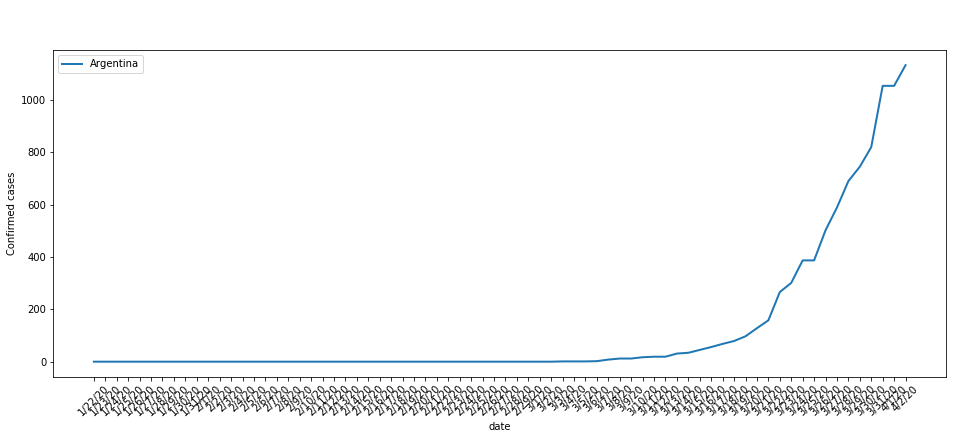

In [34]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)
plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina', 'World except China'])

plt.show()

Plot: evolucion en Argentina en escala logaritmica

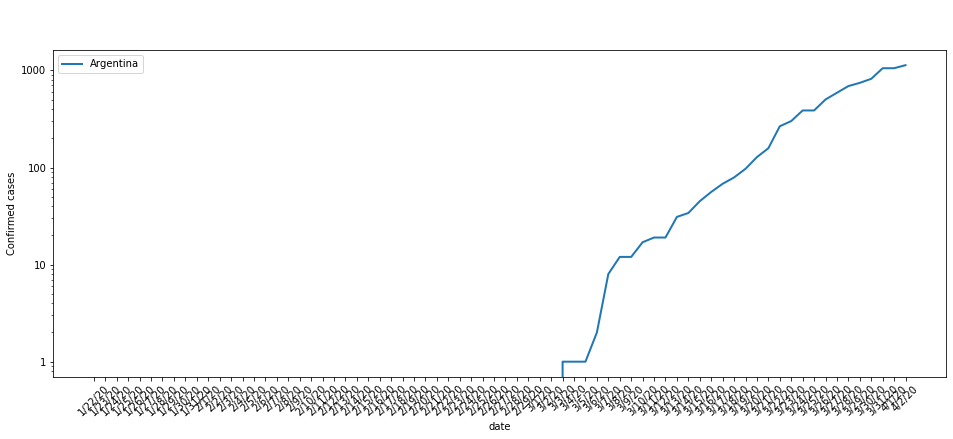

In [35]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina'])

plt.show()

## Comparemos con otros paises

In [36]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']
covid_chile = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Chile']
covid_esp = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Spain']
covid_ita = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Italy']

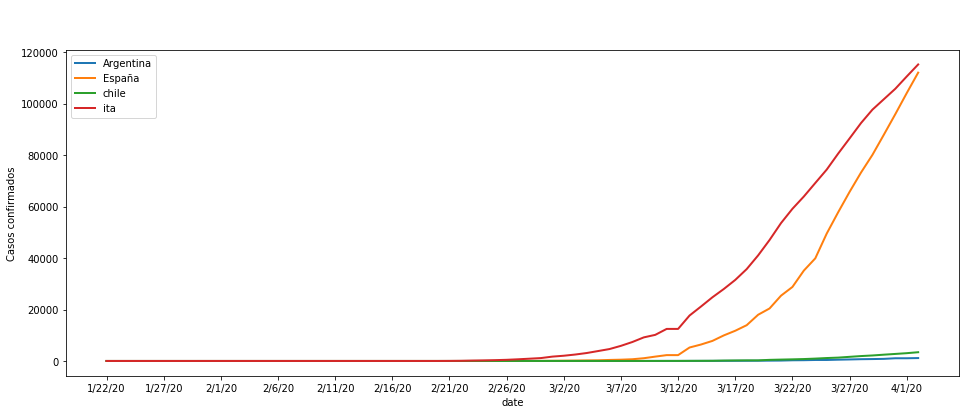

In [37]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_esp['date'], y=covid_esp['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_chile['date'], y=covid_chile['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_ita['date'], y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [38]:
t = []
d0 = datetime.datetime.strptime("1/1/20", '%m/%d/%y')
for d in covid_ita['date']:
    elapsed_days = (datetime.datetime.strptime(d, '%m/%d/%y') - d0).days
    t.append(elapsed_days)

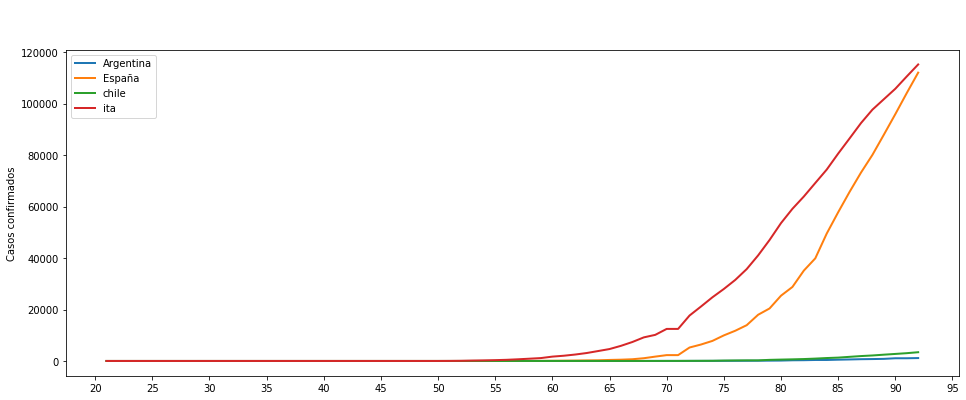

In [39]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [40]:
z = covid_arg['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_arg = t - patient_zero

z = covid_ita['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_ita = t - patient_zero

z = covid_chile['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_chile = t - patient_zero

z = covid_esp['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_esp = t - patient_zero

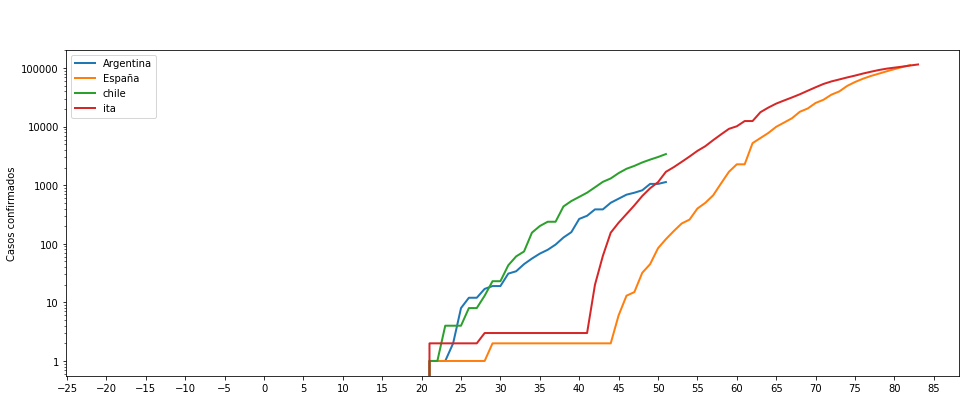

In [41]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t_arg, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_esp, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_chile, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_ita, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [42]:
df_world = pd.read_csv('../dat/pop_area.csv')

In [43]:
list(df_world['country'])[1:10]

['United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan']

In [44]:
covid_pais = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Russia']
covid_pais.size

576

In [45]:
t = []
d0 = datetime.datetime.strptime("1/1/20", '%m/%d/%y')
for d in covid_ita['date']:
    elapsed_days = (datetime.datetime.strptime(d, '%m/%d/%y') - d0).days
    t.append(elapsed_days)

In [48]:
lista = ['Argentina', 'Chile', 'United States', 'Germany', 'Iran', 'Italy']
lista = ['Argentina', 'Chile', 'Germany', 'Iran', 'Italy']
y_all = []
t_all = []
for pais in lista:
    popu = df_world[df_world['country'] == pais]['population'].values[0]
    area = df_world[df_world['country'] == pais]['area'].values[0]
    covid_pais = covid_countries_date_df[covid_countries_date_df['Country/Region'] == pais]
    
    z = covid_pais['confirmed']
    patient_zero = z.to_numpy().nonzero()[0][0]
    
    t_pais = t - patient_zero
    
    y_pais = covid_pais['confirmed'] / popu * 1.e6   
    
    y_all.append(y_pais)
    t_all.append(t_pais)
    

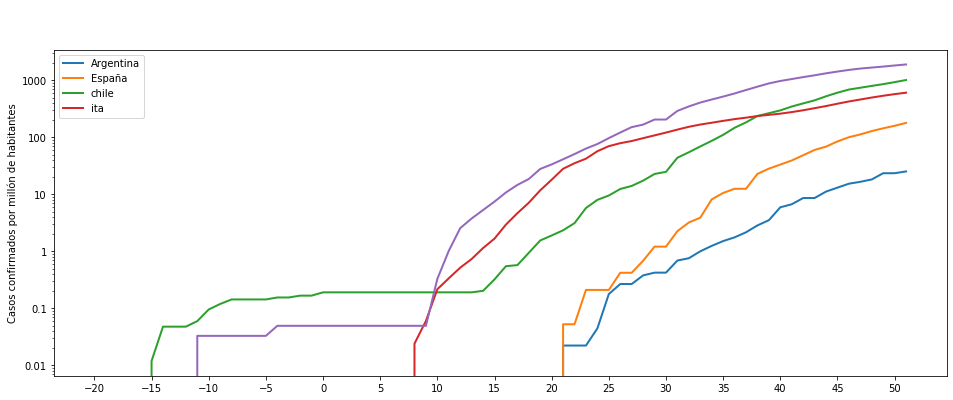

In [47]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

for y in y_all:
    sns.lineplot(x=t_arg, y=y, sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados por millón de habitantes')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()